# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow.keras.utils import array_to_img

In [80]:
import os
import tensorflow as tf
tf.random.set_seed(404)
import numpy as np

import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [3]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)
type(x_train_all)

numpy.ndarray

# Explore the Data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

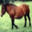

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
y_train_all[7][0]

7

In [10]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

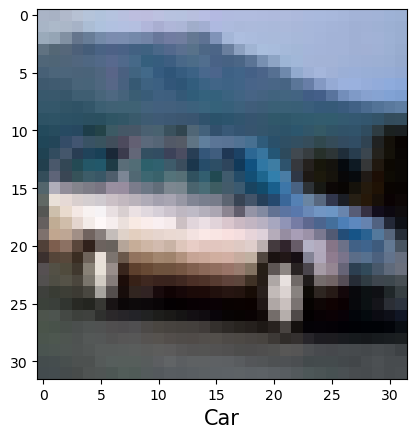

In [11]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

**Challenge:** Write a for loop to display the first 10 images from the x_train_all array in a row. Show the name of the label below the pictures. Remove the ugly tick marks. Hint use matplotlib.

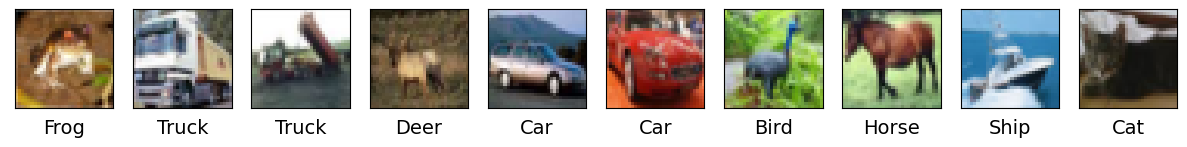

In [12]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [13]:
x_train_all[0].shape

(32, 32, 3)

In [14]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels ={c}')

images = 50000 	| width = 32 	| height = 32 	| channels =3


In [15]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [16]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [17]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [18]:
x_train_all[0][0][0][0]

0.23137254901960785

In [19]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [20]:
x_train_all.shape

(50000, 3072)

In [21]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [22]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

**Challenge:** Create two numpy arrays x_train and y_train that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from x_train_all and y_train_all respectively.

In [23]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [24]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]
x_train_xs.shape

(1000, 3072)

# Define the Neural Network using Keras

In [25]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'), 
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics='accuracy')

In [26]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics='accuracy')

In [27]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics='accuracy')

In [28]:
type(model_1)

keras.engine.sequential.Sequential

In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [30]:
32 * 32 * 3 * 128 + 128 # Total params in m1_hidden1 + Bias

393344

In [31]:
32*32*3*128+128 + (128*64+64) + (64*16+16) + (16*10+10)

402810

# Tensorboard (visualising learning)

In [32]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime ("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Succesfully created directory')

    return TensorBoard(log_dir=dir_paths)  # CMD: tensorboard --logdir="filepath"

# Fit the model

In [33]:
samples_per_batch = 1000

In [34]:
# %%time
# nr_epochs = 100
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model_1')], verbose=0, validation_data=(x_val, y_val))

In [35]:
# %%time
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model_2')], verbose=0, validation_data=(x_val, y_val))

In [36]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model_1_XL')], verbose=0, validation_data=(x_val, y_val))

Succesfully created directory
Wall time: 29.7 s


In [37]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model_2_XL')], verbose=0, validation_data=(x_val, y_val))

Succesfully created directory
Wall time: 56.5 s


In [38]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model_3_XL')], verbose=0, validation_data=(x_val, y_val))

Succesfully created directory
Wall time: 58.5 s


# Predictions on Individual Images

In [41]:
x_val[0].shape

(3072,)

In [42]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [45]:
np.set_printoptions(precision=3)

In [46]:
model_2.predict(test)

1/1 [==============================] - 0s 9ms/step


array([[2.353e-02, 1.617e-03, 7.991e-02, 1.013e-01, 2.881e-01, 1.010e-01,
        2.990e-01, 1.049e-01, 2.872e-04, 2.989e-04]], dtype=float32)

In [48]:
model_2.predict(x_val).shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [50]:
np.argmax(model_2.predict(test), axis=-1)

1/1 [==============================] - 0s 9ms/step


array([6], dtype=int64)

In [51]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset.

In [55]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = np.argmax(model_2.predict(test_img)[0], axis=-1)
    
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

1/1 [==============================] - 0s 10ms/step
Actual value: 6 vs. predicted: 6
1/1 [==============================] - 0s 12ms/step
Actual value: 9 vs. predicted: 1
1/1 [==============================] - 0s 14ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 11ms/step
Actual value: 4 vs. predicted: 6
1/1 [==============================] - 0s 13ms/step
Actual value: 1 vs. predicted: 8
1/1 [==============================] - 0s 13ms/step
Actual value: 1 vs. predicted: 1
1/1 [==============================] - 0s 12ms/step
Actual value: 2 vs. predicted: 2
1/1 [==============================] - 0s 14ms/step
Actual value: 7 vs. predicted: 7
1/1 [==============================] - 0s 12ms/step
Actual value: 8 vs. predicted: 8
1/1 [==============================] - 0s 13ms/step
Actual value: 3 vs. predicted: 9


# Evaluation

In [56]:
model_2.metrics_names

['loss', 'accuracy']

In [60]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 4ms/step - loss: 1.4568 - accuracy: 0.4853
Test loss is 1.46 and test accuracy is 48.5%


### Confusion Matrix

In [64]:
predictions = np.argmax(model_2.predict(x_test), axis=-1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

313/313 [==============================] - 0s 2ms/step


In [65]:
conf_matrix.shape

(10, 10)

In [81]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [69]:
conf_matrix.max()

668

In [70]:
conf_matrix.min()

5

In [82]:
conf_matrix[0]

array([590,  26,  75,  12,  44,  15,  30,  33, 150,  25], dtype=int64)

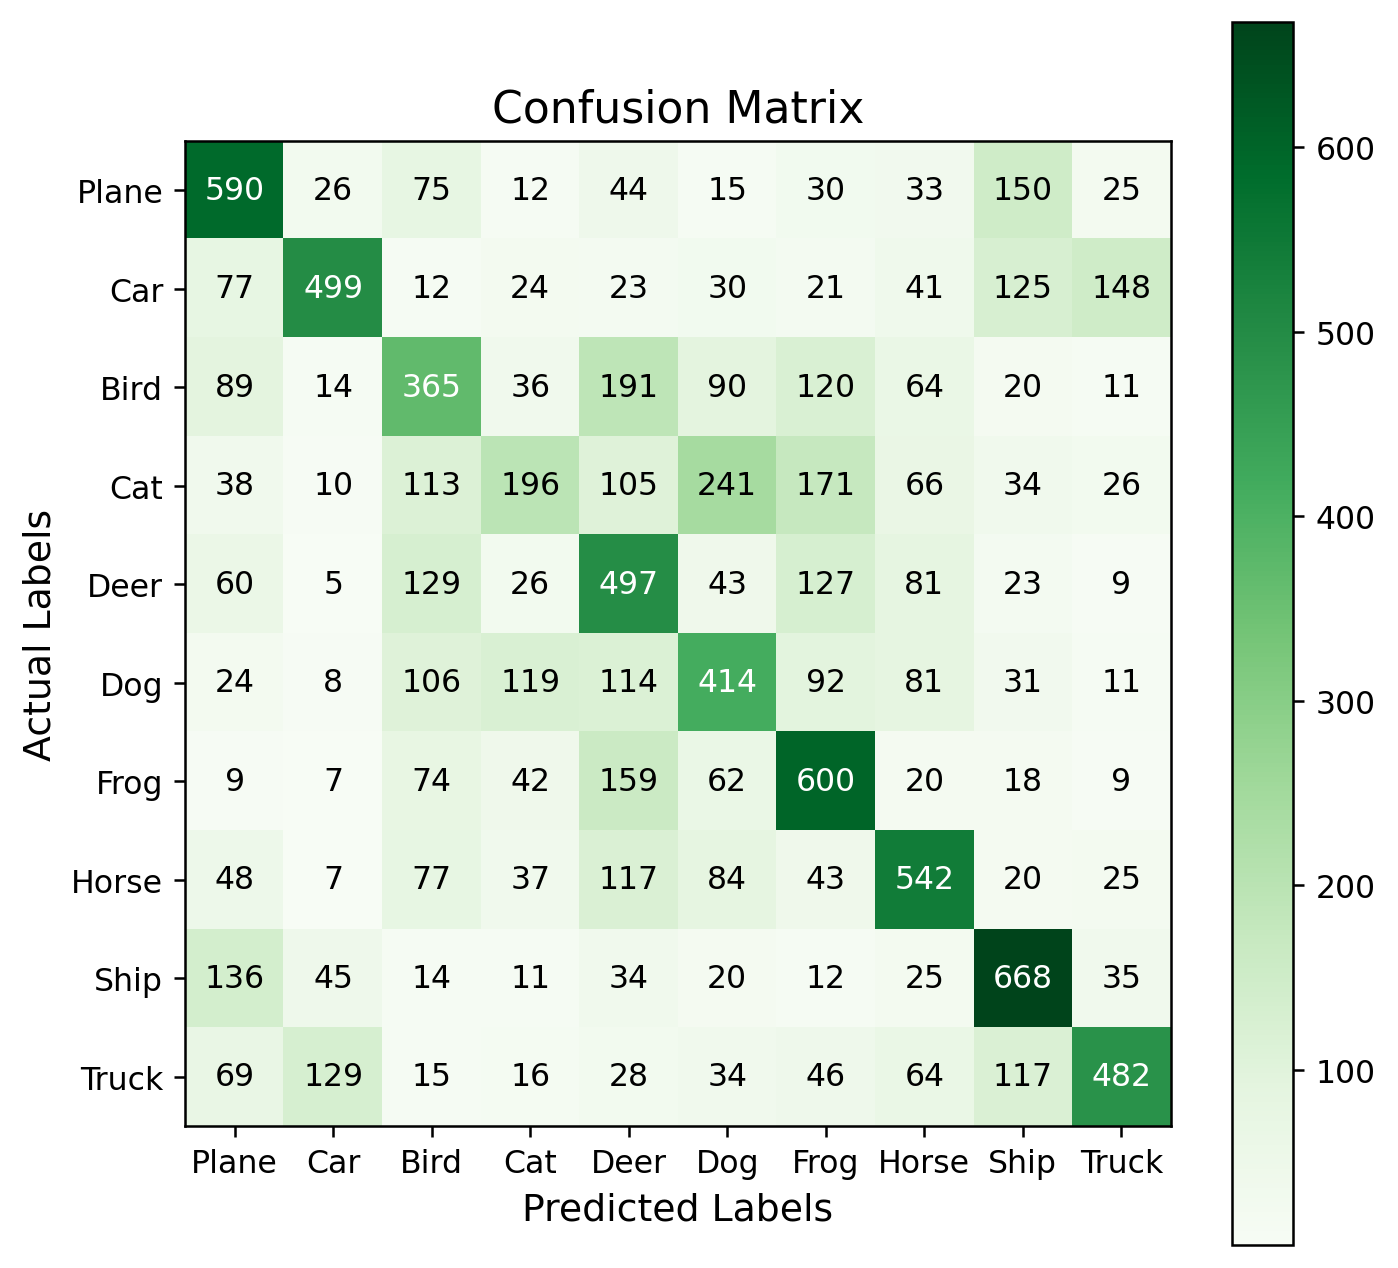

In [91]:
plt.figure(figsize=(7, 7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', verticalalignment='center',
             color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

**Challenge:** 
What do the numbers down the diagonal represent? 
Predicted errors.

What do the other numbers (excluding the number in the diagonal) in a single row represent? 
Predicted errors of the same img. 

Try to identify the false positives; 
Darker cells out the diagonal.

False negatives; 
Clearer cells inside the diagonal. 

True positives in the confusion matrix; 
Darker cells inside the diagonal.

In [92]:
# True Positives
np.diag(conf_matrix)

array([590, 499, 365, 196, 497, 414, 600, 542, 668, 482], dtype=int64)

In [93]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.59 , 0.499, 0.365, 0.196, 0.497, 0.414, 0.6  , 0.542, 0.668,
       0.482])

In [94]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.518, 0.665, 0.372, 0.378, 0.379, 0.401, 0.475, 0.533, 0.554,
       0.617])

In [96]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 48.53%


In [100]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 48.92%
Model 2 f score is 48.72%
